In [118]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [119]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [120]:
dataset.shape

(50, 5)

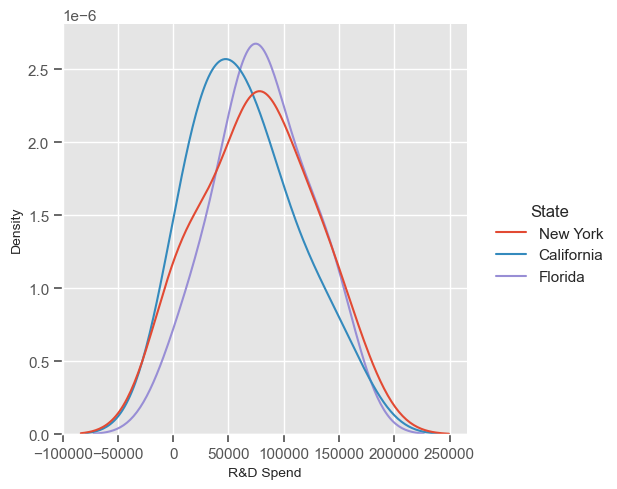

In [121]:
sns.displot(data=dataset, x='R&D Spend', hue='State', kind='kde')

http://www.normalesup.org/~carpenti/Notes/Skewness-Kurtosis/caract-forme.html

In [122]:
from scipy.stats import kurtosis, skew
print("skew : ",skew(dataset['R&D Spend']))
print("kurt : ",kurtosis(dataset['R&D Spend']))

skew :  0.15904052321503395
kurt :  -0.8050676431519039


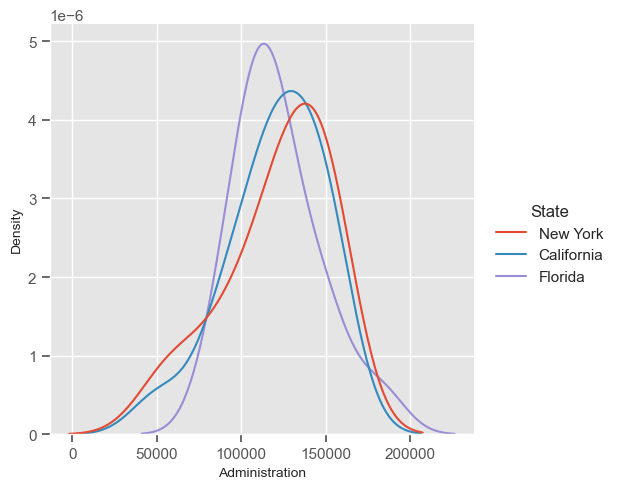

In [123]:
sns.displot(data=dataset, x='Administration', hue='State', kind='kde')

In [124]:
print("skew : ",skew(dataset['Administration']))
print("kurt : ",kurtosis(dataset['Administration']))

skew :  -0.4742300698920047
kurt :  0.08553840791984113


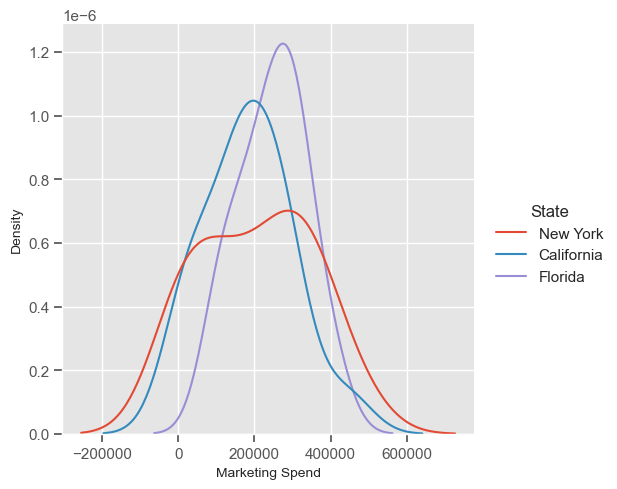

In [125]:
sns.displot(data=dataset, x='Marketing Spend', hue='State', kind='kde')

In [126]:
print("skew : ",skew(dataset['Marketing Spend']))
print("kurt : ",kurtosis(dataset['Marketing Spend']))

skew :  -0.04506631617666136
kurt :  -0.7240327111087308


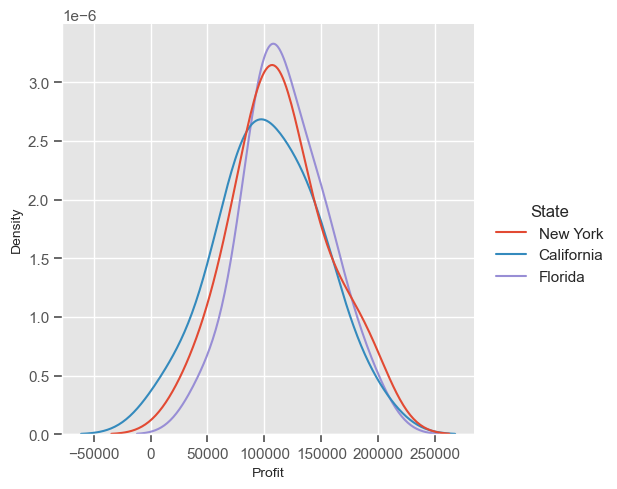

In [127]:
sns.displot(data=dataset, x='Profit', hue='State', kind='kde')

In [128]:
print("skew : ",skew(dataset['Profit']))
print("kurt : ",kurtosis(dataset['Profit']))

skew :  0.02258638356958943
kurt :  -0.17529637679752152


In [129]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [130]:
dataset[dataset['R&D Spend'] == 0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [131]:
dataset.describe(include='object')

,State
count,50
unique,3
top,New York
freq,17


In [132]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [133]:
sns.set(style="whitegrid")

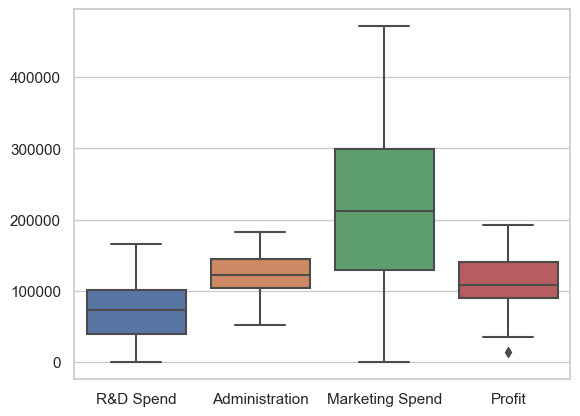

In [134]:
ax = sns.boxplot(data=dataset, orient="v")

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     object 
 4   Profit           49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [135]:
sns.set(style="ticks")

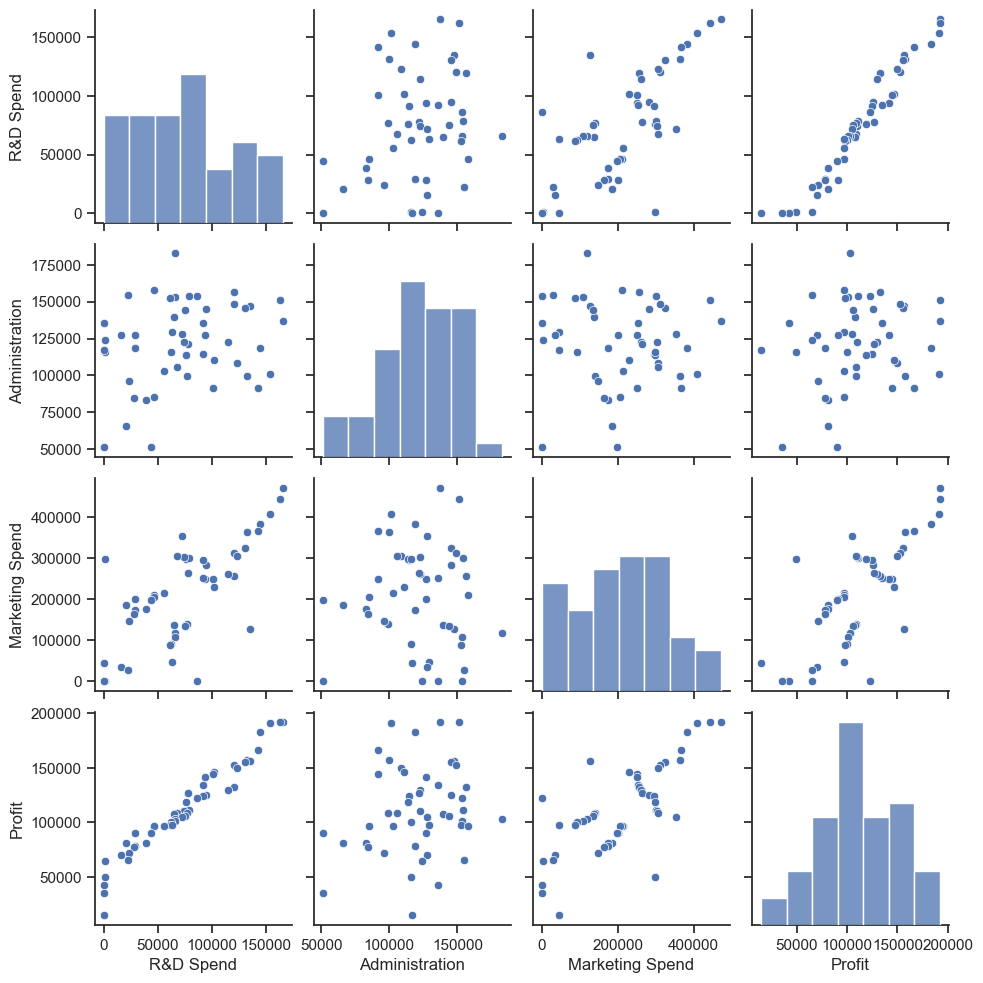

In [136]:
sns.pairplot(dataset)

In [137]:
correlations = dataset.corr(method='pearson')

<Axes: >

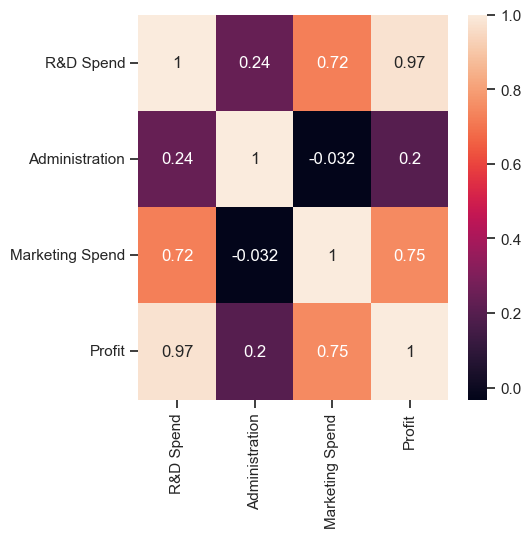

In [138]:
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [139]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [140]:
X.shape

(50, 4)

In [141]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[0:5,:]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [142]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X.astype('float64')
X.shape

(50, 6)

In [143]:
X[0:5,:]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [ ]:

if X.shape[1]==6:
    X = X[:,1:]
X.shape

(50, 5)

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(40, 5)

In [150]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [151]:
print(f'b = {regressor.intercept_}')
print(f'm_i = {regressor.coef_}')

b = 42554.16761776563
m_i = [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]


In [152]:
y_pred = regressor.predict(X_test)

In [153]:
for i in range(10):
    print([y_test[i],y_pred[i]])

[103282.38, 103015.20159796496]
[144259.4, 132582.27760815565]
[146121.95, 132447.73845174754]
[77798.83, 71976.09851258829]
[191050.39, 178537.48221053844]
[105008.31, 116161.24230163361]
[81229.06, 67851.692096762]
[97483.56, 98791.733746881]
[110352.25, 113969.43533011648]
[166187.94, 167921.06569549712]


In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [155]:
def rmse(targets, predictions): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [156]:
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {rmse(y_test, y_pred)}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'R2 = {r2_score(y_test,y_pred)}')

MSE = 83502864.03252874
RMSE = 9137.990152792283
MAE = 7514.293659637136
R2 = 0.9347068473282805
